In [1]:
import os

In [2]:
os.getcwd()

'/Users/atharvajoshi/Desktop/Devnagari Text Recognition'

In [3]:
TRAINING_DIR = '/Users/atharvajoshi/Desktop/Devnagari Text Recognition/DevanagariHandwrittenCharacterDataset/Train'
TEST_DIR = '/Users/atharvajoshi/Desktop/Devnagari Text Recognition/DevanagariHandwrittenCharacterDataset/Test'

In [4]:
import cv2

In [5]:
import numpy as np

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

## Data Preprocessing

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

In [9]:
train_generation = ImageDataGenerator(
                   rescale=1./255,
)

In [10]:
train_flow = train_generation.flow_from_directory(TRAINING_DIR, target_size=(32,32), batch_size=64, color_mode='grayscale')

Found 61200 images belonging to 36 classes.


In [11]:
test_generation = ImageDataGenerator(
                  rescale=1.0/255
)

In [12]:
test_flow = test_generation.flow_from_directory(TEST_DIR, target_size=(32,32), batch_size=64, color_mode='grayscale')

Found 10800 images belonging to 36 classes.


# Defining the model architecture

In [13]:
model = Sequential([
                    Conv2D(32, activation='relu', input_shape=(32,32,1), kernel_size=(5,5)),
                    MaxPooling2D((2,2)),
                    Dropout(0.2),

                    Conv2D(64, activation='relu', kernel_size=(5,5)),
                    MaxPooling2D((2,2)),
                    Dropout(0.2),

                    Flatten(),
                    Dense(100,activation='relu'),
                    Dense(36, activation='softmax')
])

Metal device set to: Apple M1


2022-01-11 20:01:43.929842: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-11 20:01:43.929954: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

In [17]:
history = model.fit(train_flow,
                    epochs = 8,
                    validation_data= test_flow,
                    callbacks = [es],
                    )

Epoch 1/8


2022-01-11 20:01:44.039077: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-11 20:01:44.176989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


955/957 [============================>.] - ETA: 0s - loss: 0.7032 - acc: 0.7968

2022-01-11 20:01:57.008819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


957/957 [==============================] - 15s 15ms/step - loss: 0.7025 - acc: 0.7970 - val_loss: 0.2290 - val_acc: 0.9313
Epoch 2/8
957/957 [==============================] - 14s 15ms/step - loss: 0.1926 - acc: 0.9405 - val_loss: 0.1492 - val_acc: 0.9554
Epoch 3/8
957/957 [==============================] - 14s 15ms/step - loss: 0.1281 - acc: 0.9597 - val_loss: 0.1142 - val_acc: 0.9651
Epoch 4/8
957/957 [==============================] - 14s 15ms/step - loss: 0.0957 - acc: 0.9692 - val_loss: 0.1041 - val_acc: 0.9681
Epoch 5/8
957/957 [==============================] - 14s 14ms/step - loss: 0.0755 - acc: 0.9758 - val_loss: 0.0897 - val_acc: 0.9739
Epoch 6/8
957/957 [==============================] - 14s 14ms/step - loss: 0.0641 - acc: 0.9792 - val_loss: 0.0753 - val_acc: 0.9775
Epoch 7/8
957/957 [==============================] - 14s 15ms/step - loss: 0.0554 - acc: 0.9816 - val_loss: 0.0929 - val_acc: 0.9744
Epoch 00007: early stopping


In [18]:
predictions = model.predict(test_flow)

2022-01-11 20:03:23.025108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [19]:
predictions

array([[3.9369858e-15, 2.0205458e-22, 9.6148436e-16, ..., 5.4177497e-19,
        3.9997587e-14, 4.7901088e-19],
       [3.7101921e-13, 1.3959451e-13, 4.4366480e-10, ..., 3.4391403e-09,
        5.0650659e-14, 6.7314801e-08],
       [8.8141254e-09, 2.6941574e-16, 2.1808562e-14, ..., 1.2444405e-05,
        1.1741047e-10, 6.5248972e-15],
       ...,
       [9.9642855e-01, 4.0085725e-17, 2.6847253e-12, ..., 9.0476299e-10,
        3.0629567e-03, 3.7219954e-09],
       [9.9994528e-01, 1.2777061e-16, 1.2604428e-08, ..., 1.3081185e-13,
        4.9365575e-05, 1.5237818e-10],
       [5.2977717e-10, 4.4486706e-23, 9.0019088e-17, ..., 5.3647808e-17,
        4.3495565e-11, 2.8946183e-18]], dtype=float32)

In [20]:
model.evaluate(test_flow)

169/169 [==============================] - 1s 8ms/step - loss: 0.0929 - acc: 0.9744


[0.09287262707948685, 0.9743518233299255]

In [21]:
import matplotlib.pyplot as plt

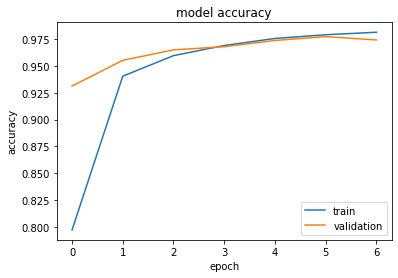

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

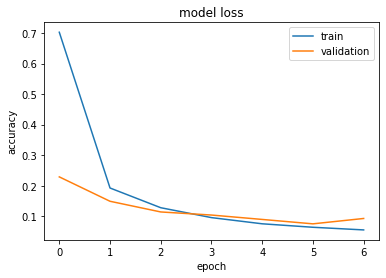

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [25]:
model.save('devnagari_model_final_final.h5')